# The Vanishing Gradients Problem

The vanishing gradients problem means that gradients become extremely small.

They can become so small that weight updates are almost zero.

As a result, the network stops learning, especially in the early (lower) layers.

Over the years, several techniques were developed to deal with vanishing gradients:

*ReLU activations (and variants like Leaky ReLU, ELU, GELU):*<br>
They don’t squash values into a small range like sigmoid/tanh, so gradients don’t shrink as much.

*Better weight initialization:*<br>
Methods like He initialization or Xavier/Glorot initialization ensure that activations and gradients have roughly the same variance across layers

*Batch normalization:*<br>
Normalizes activations within each batch, keeping gradients in a reasonable range.

*Residual connections (ResNets):*<br>
Add shortcut connections that let gradients flow directly through layers, drastically reducing the vanishing effect.

# Code Example

In [ ]:
zahlen = [1,2,3]

def f(a,b,c):
    return 2*a+3*b**2+4*c**5

f(*zahlen)

In [35]:
import torch
import torch.nn as nn

# Create a deep network with sigmoid activations
class DeepNet(nn.Module):
    def __init__(self, depth=20):
        super().__init__()
        layers = []
        for _ in range(depth):
            layers.append(nn.Linear(100, 100))
            #layers.append(nn.Sigmoid())  # <- prone to vanishing gradients
            #layers.append(nn.Tanh())
            layers.append(nn.ReLU())  # <- not that prone to vanishing gradients
        self.net = nn.Sequential(*layers)
        self.output = nn.Linear(100, 1)
    
    def forward(self, x):
        #return self.output(self.net(x))
        return self.output(self.net().forward(x))

# Create random input
x = torch.randn(1, 100)
model = DeepNet(depth=20)
loss_fn = nn.MSELoss()

# Forward + backward pass
target = torch.tensor([[1.0]])
output = model(x)
loss = loss_fn(output, target)
loss.backward()

# Inspect average gradient magnitude per layer
for i, layer in enumerate(model.net):
    if isinstance(layer, nn.Linear):
        #print(layer.weight.grad)
        grad_mean = layer.weight.grad.abs().mean().item()
        print(f"Layer {i//2 + 1}: mean |grad| = {grad_mean:.10f}")


TypeError: Sequential.forward() missing 1 required positional argument: 'input'

In [9]:
model

DeepNet(
  (net): Sequential(
    (0): Linear(in_features=100, out_features=100, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=100, out_features=100, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=100, out_features=100, bias=True)
    (5): Sigmoid()
    (6): Linear(in_features=100, out_features=100, bias=True)
    (7): Sigmoid()
    (8): Linear(in_features=100, out_features=100, bias=True)
    (9): Sigmoid()
    (10): Linear(in_features=100, out_features=100, bias=True)
    (11): Sigmoid()
    (12): Linear(in_features=100, out_features=100, bias=True)
    (13): Sigmoid()
    (14): Linear(in_features=100, out_features=100, bias=True)
    (15): Sigmoid()
    (16): Linear(in_features=100, out_features=100, bias=True)
    (17): Sigmoid()
    (18): Linear(in_features=100, out_features=100, bias=True)
    (19): Sigmoid()
    (20): Linear(in_features=100, out_features=100, bias=True)
    (21): Sigmoid()
    (22): Linear(in_features=100, out_features=100, bias=True)
    

In [22]:
abs(list(model.net)[0].weight.grad).mean()

tensor(1.0694e-18)

# Comparing sigmoid and ReLU activation functions

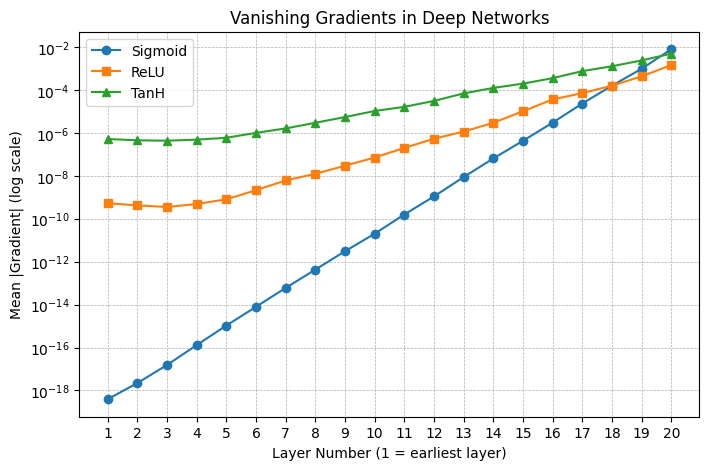

In [34]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Helper function to compute gradient magnitudes
def get_gradients(activation, depth=20):
    class DeepNet(nn.Module):
        def __init__(self, activation):
            super().__init__()
            layers = []
            for _ in range(depth):
                layers.append(nn.Linear(100, 100))
                layers.append(activation())
            self.net = nn.Sequential(*layers)
            self.output = nn.Linear(100, 1)
        
        def forward(self, x):
            return self.output(self.net(x))

    x = torch.randn(1, 100)
    model = DeepNet(activation)
    loss_fn = nn.MSELoss()
    target = torch.tensor([[1.0]])
    output = model(x)
    loss = loss_fn(output, target)
    loss.backward()

    grads = []
    for layer in model.net:
        if isinstance(layer, nn.Linear):
            grads.append(layer.weight.grad.abs().mean().item())
    return grads

# Compute gradients for sigmoid and ReLU networks
N = 20
sigmoid_grads = get_gradients(nn.Sigmoid, depth=N)
relu_grads = get_gradients(nn.ReLU, depth=N)
tanh_grads = get_gradients(nn.Tanh, depth=N)

# Plot
plt.figure(figsize=(8, 5))
plt.semilogy(range(1, N+1), sigmoid_grads, 'o-', label='Sigmoid')
plt.semilogy(range(1, N+1), relu_grads, 's-', label='ReLU')
plt.semilogy(range(1, N+1), tanh_grads, '^-', label='TanH')
plt.xlabel("Layer Number (1 = earliest layer)")
plt.ylabel("Mean |Gradient| (log scale)")
plt.title("Vanishing Gradients in Deep Networks")
plt.xticks(range(1,N+1))
plt.legend()
plt.grid(True, ls="--", lw=0.5)
plt.show()
